<h1>Context</h1>

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. Randi Griffin scraped this data from www.sports-reference.com in May 2018. Randi's kaggle page pertaining to the data can be found <a href="https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/home">here</a>.

Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.

<h1>Content</h1>

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:
<ul>
    <li>ID - Unique number for each athlete</li>
    <li>Name - Athlete's name</li>
    <li>Sex - M or F</li>
    <li>Age - Integer</li>
    <li>Height - In centimeters</li>
    <li>Weight - In kilograms</li>
    <li>Team - Team name</li>
    <li>NOC - National Olympic Committee 3-letter code</li>
    <li>Games - Year and season</li>
    <li>Year - Integer</li>
    <li>Season - Summer or Winter</li>
    <li>City - Host city</li>
    <li>Sport - Sport</li>
    <li>Event - Event</li>
    <li>Medal - Gold, Silver, Bronze, or NA</li>
    <li>Acknowledgements</li>
</ul>

The Olympic data on www.sports-reference.com is the result of an incredible amount of research by a group of Olympic history enthusiasts and self-proclaimed 'statistorians'. Check out their blog for more information.

<h1>Index of content</h1>
Importing the modules.
Data importing.
Collecting information about the two dataset.
Joining the dataframes.
Distribution of the age of gold medalists.
Women in Athletics.
Medals per country.
Disciplines with the greatest number of Gold Medals.
What is the median height/weight of an Olympic medalist?
Evolution of the Olympics over time.

10.1 Variation of male/female athletes over time (Summer Games).

10.2 Variation of age along time.

10.3 Variation of weight along time.

10.4 Variation of height along time.

10.5 Variation of age for Italian athletes.

10.6 Variation of height/weight along time for particular disciplines.

10.6.1 Gymnastic.

10.6.2 Weightlifting.

Conclusions.

<h1>1. Importing modules</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

from matplotlib import pyplot as plt

import os
print(os.listdir("./120-years-of-olympic-history-athletes-and-results"))

['athlete_events.csv', 'noc_regions.csv']


<h1>2. Importing data</h1>

In [2]:
data = pd.read_csv("./120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
regions = pd.read_csv("./120-years-of-olympic-history-athletes-and-results/noc_regions.csv")

<h1>3. Collecting information about the two datasets</h1>

We will first observe the content of data and then explore the data.

In [3]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
regions.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,BEN,Germany,United Arab Republic
freq,1,4,1


In [7]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


<h1>4. Joining dataframes</h1>

Now let's merge the two data sets into a dataframe.

In [8]:
df = pd.merge(data, regions, on = 'NOC', how = 'left')

In [9]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [10]:
df.count()

ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
region    270746
notes       5039
dtype: int64

Looks like we are missing some values in columns Age, Height, Weight, and Regions. Some of the other columns like Medals and notes do not have 271116 values, but this is to be expected since not athlete gets a medal, and notes are likely meta data associated with the row. 

Let's take a quick look at some values in the notes column to see if there is any useful information.

In [11]:
df[df.notes.notnull()].head(50)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
238,116,Hosni Mohamed Abbas,M,28.0,NaN,60.0,United Arab Republic,UAR,1960 Summer,1960,Summer,Roma,Weightlifting,Weightlifting Men's Featherweight,NaN,Syria,United Arab Republic
302,163,Ismail Abdallah,M,NaN,NaN,NaN,United Arab Republic,UAR,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Syria,United Arab Republic
303,163,Ismail Abdallah,M,NaN,NaN,NaN,United Arab Republic,UAR,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Team All-Around,NaN,Syria,United Arab Republic
304,163,Ismail Abdallah,M,NaN,NaN,NaN,United Arab Republic,UAR,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Syria,United Arab Republic
305,163,Ismail Abdallah,M,NaN,NaN,NaN,United Arab Republic,UAR,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Horse Vault,NaN,Syria,United Arab Republic
306,163,Ismail Abdallah,M,NaN,NaN,NaN,United Arab Republic,UAR,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Syria,United Arab Republic
307,163,Ismail Abdallah,M,NaN,NaN,NaN,United Arab Republic,UAR,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Syria,United Arab Republic
308,163,Ismail Abdallah,M,NaN,NaN,NaN,United Arab Republic,UAR,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Rings,NaN,Syria,United Arab Republic
309,163,Ismail Abdallah,M,NaN,NaN,NaN,United Arab Republic,UAR,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Pommelled Horse,NaN,Syria,United Arab Republic
321,174,Ali Mohamed Badawi Abdel Fattah Badawi,M,19.0,NaN,NaN,United Arab Republic,UAR,1960 Summer,1960,Summer,Roma,Football,Football Men's Football,NaN,Syria,United Arab Republic


From looking at the first 50 non NaN rows for notes, we can see that the notes row only contains redudant information. We can disregard the column safely.

<h1>5. Distribution of the age of gold medalist</h1>

Let's create a dataframe that contains only gold medalists.

In [12]:
gold_df = df[(df.Medal == 'Gold')]
gold_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


Let's check if how many of the the values in the age column are NaN

In [13]:
gold_df.isnull().sum()

ID            0
Name          0
Sex           0
Age         148
Height     2833
Weight     3118
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        1
notes     13201
dtype: int64

148 are NaN, not too bad. I think we can live with dropping these rows and continuing with our analysis.

In [14]:
gold_df = gold_df[np.isfinite(gold_df['Age'])]

/Users/dell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


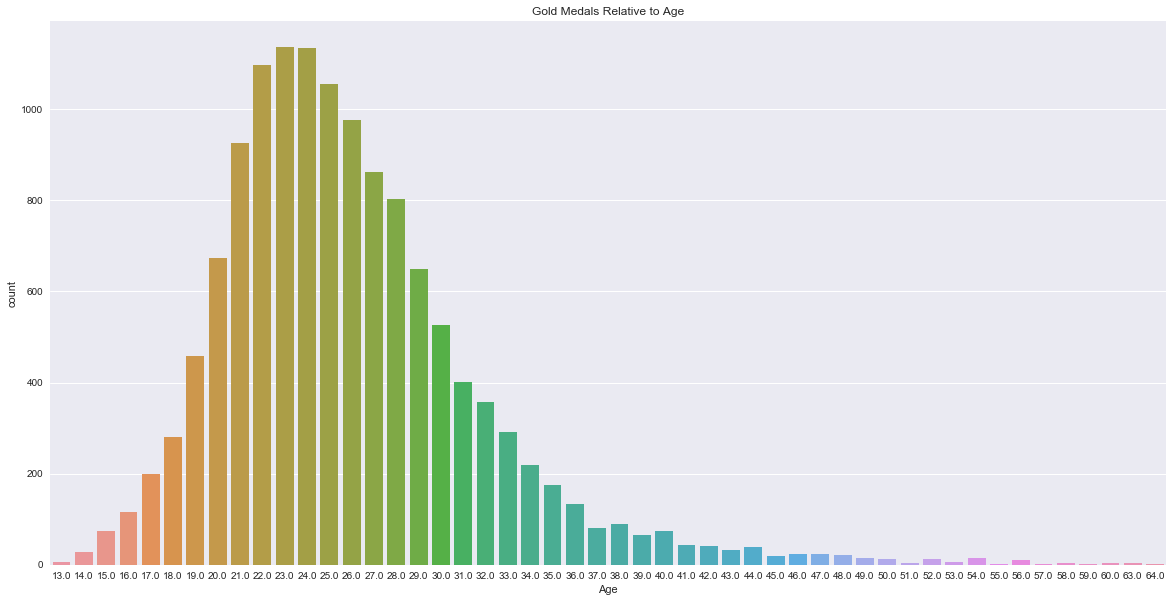

In [15]:
plt.figure(figsize = (20, 10))
sns.set(font_scale =1)
sns.countplot(x= "Age", data = gold_df)
plt.title('Gold Medals Relative to Age')
plt.show()

/Users/dell/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


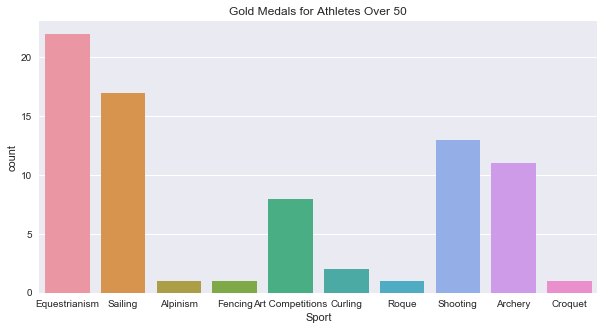

In [16]:
plt.figure(figsize=(10, 5))
sns.set(font_scale=1)
sns.countplot(gold_df['Sport'][gold_df.Age > 49])
plt.title('Gold Medals for Athletes Over 50')
plt.show()

From these graphs we can tell that the gold medal count for athletes age peak in the early 20's. We can also see that for certain sports, there are athletes that obtain gold well past their 50's.

<h1>Medal Count Distribution by Country</h1>

Here we will explore how many Medals each country has won since the beggining of the Olympic games. We will then attempt to create an interactive map to show the medal count by country over the years.

<h1>Home Advantage</h1>

In this section we will explore the existance of home country advantage for medal winners, if any. Does the home country have a statistical edge, relative to none home countries?

First we will find the hosting countries for each year and find their medal count for the year.


In [17]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Something we can see imidiately is that the hosting location is listed by city, not country. If we want to compare the country each athlete is from, we must add a column for the hosting country.

Another thing we can see from the first 5 rows of the dataframe, in row 4, the athlete represents both Denmark and Sweden. We must handle these sepcial cases also. 

Let's start by isolating athletes that may belong to more than 1 country.

In [18]:
df_dual = df.loc[df['Team'].str.contains('/')]

df_dual.count()

ID        43
Name      43
Sex       43
Age       29
Height     3
Weight     9
Team      43
NOC       43
Games     43
Year      43
Season    43
City      43
Sport     43
Event     43
Medal     30
region    43
notes      1
dtype: int64

From the looks of it, there are 43 athletes that represent 2 or more teams and 30 medal winners out of the 43. It is interesting to note that most of these athletes do not have Height and Weight data. I am betting the reason behind the lack of data and the allowance for athletes to represent multiple nations stems from the particular era the data comes from. 

Let's see when these athletes participated in the Olympic games.

df_dual.Year.describe()

As we suspected, the participation years of these athletes range from 1896 to 1908.

Now we must decide what to do with what to do with these athletes. Originally I thought we could split the data into 2 rows, so they could be counted toward both countries. However after searching through Google and Wikipedia, it looks to be the case that these athletes represented only one country, and mostly representing the county on the left side of the /. So it makes sense to drop the right side of the data and leave it at that. Actually both sides makes sense so lets douplicate the entries, add a row for each team they were on.

In [167]:
df_dual.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
20615,10875,Rodrigo Bertinotti,M,19.0,NaN,NaN,Pistoja/Firenze,ITA,1906 Summer,1906,Summer,Athina,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Italy,NaN
24683,12929,John Mary Pius Boland,M,25.0,NaN,NaN,Great Britain/Germany,GBR,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Doubles,Gold,UK,NaN
37866,19459,Emilio Cesarana,M,NaN,NaN,NaN,Barion/Bari-2,ITA,1906 Summer,1906,Summer,Athina,Rowing,Rowing Men's Coxed Pairs (1 kilometres),Silver,Italy,NaN
42111,21717,Francesco Civera,M,23.0,NaN,NaN,Barion/Bari-2,ITA,1906 Summer,1906,Summer,Athina,Rowing,Rowing Men's Coxed Pairs (1 kilometres),Silver,Italy,NaN


Now Let's create a column for host country. This way we can search medal winners by host country. use geopandas i think

In [30]:
df_medals = df.loc[df['Medal'].notnull()]
df_medals.describe()

,ID,Age,Height,Weight,Year
count,39783.000000,39051.000000,31072.000000,30456.000000,39783.000000
mean,69407.051806,25.925175,177.554197,73.770680,1973.943845
std,38849.980737,5.914026,10.893723,15.016025,33.822857
min,4.000000,10.000000,136.000000,28.000000,1896.000000
25%,36494.000000,22.000000,170.000000,63.000000,1952.000000
50%,68990.000000,25.000000,178.000000,73.000000,1984.000000
75%,103461.500000,29.000000,185.000000,83.000000,2002.000000
max,135563.000000,73.000000,223.000000,182.000000,2016.000000


We are going to use geopy for the next part. If you don't have it installed, you can download it for free from their website <a href="https://geopy.readthedocs.io/en/stable/">here</a> or through pip or conda. 

This will allow us to make API calls to reverse geolocation services like Google, Bing, and Nominatim. Here we will be using Nominatim. Let's import the dependencies and try to see what we get when we enter Paris as the argument.

In [68]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my-application")
loc = geolocator.geocode('Paris', language='en')
print(loc.address)

Paris, Ile-de-France, Metropolitan France, France


Great! we can see that we get data pertaining to Paris, France. In the next step we will populate our dataframe with a country column.


Originally I ran the following line to fill the country column with values:

df['Country'] = df_dual['City'].apply(geolocator.geocode)

Do you guys see what the problem with this code is? It ends up making a huge number of API calls and eventually we get a 'Too Many Requests' error. So we need a work around.

The solution to it is quite simple. We just need to identify each unique city name and create a dataframe from them. Then we can run the same code segment from above to create a dataframe with city names and country names side by side.

In [50]:
df_locations = df['City'].unique()
df_locations.sort()
df_locations = pd.DataFrame(data = df_locations, columns = ['City'])

In [166]:
df_locations.head()

,City,Country
0,Albertville,France
1,Amsterdam,The Netherlands
2,Antwerpen,Belgium
3,Athina,Greece
4,Atlanta,USA


We just reduced 271116 API calls down to 41! now that's efficiency. 

Next we will make the API calls to add the Country column to the df_locations. Don't forget the argument language='en' or we will get text in the regions native language. 

In [71]:
df_locations['Country'] = df_locations['City'].apply(geolocator.geocode, language='en')

In [77]:
df_locations.head()

,City,Country
0,Albertville,"(Albertville, Savoy, Auvergne-Rhône-Alpes, Met..."
1,Amsterdam,"(Amsterdam, Centrum, Amsterdam, North Holland,..."
2,Antwerpen,"(Antwerp, Flanders, Belgium, (51.2211097, 4.39..."
3,Athina,"(Athens, Municipality of Athens, Regional Unit..."
4,Atlanta,"(Atlanta, Fulton County, Georgia, USA, (33.749..."


We have successfully retrieved information about the country. Unfortunately we have other data such as geographic coordinates and municipalities. Let's try to isolate the country name from the rest.

In [98]:
#convert country type from object to string
df_locations['Country'] = df_locations['Country'].apply(str)

In [139]:
#split country data on ',' and store as temp dataframe
temp_df = df_locations['Country'].str.split(',').to_frame()

In [161]:
#iterate over each series in the temp_df, 
#extracting the last value from each series; the last value is the country name
temp_list = []
for lists in temp_df['Country']:
    temp_list.append(lists[-1])

In [163]:
temp_list

[' France',
 ' The Netherlands',
 ' Belgium',
 ' Greece',
 ' USA',
 ' Spain',
 ' PRC',
 ' Germany',
 ' Canada',
 ' France',
 ' Italy',
 ' Germany',
 ' France',
 ' Finland',
 ' Austria',
 ' USA',
 ' Norway',
 ' United Kingdom',
 ' USA',
 ' Australia',
 ' Mexico',
 ' Canada',
 ' Russia',
 ' Germany',
 ' Japan',
 ' Norway',
 ' France',
 ' Brazil',
 ' Italy',
 ' USA',
 ' Switzerland',
 ' Japan',
 ' B&H',
 ' South Korea',
 ' Russia',
 ' USA',
 ' USA',
 ' Sweden',
 ' Australia',
 ' Japan',
 ' Italy',
 ' Canada']

Looks great, now that we have the list of countries, let's add them to our df_locations

In [165]:
df_locations['Country'] = temp_list
df_locations.head()

,City,Country
0,Albertville,France
1,Amsterdam,The Netherlands
2,Antwerpen,Belgium
3,Athina,Greece
4,Atlanta,USA


Success!

Now that we found the hosting countries medal count, let us see if the hosting year's medal count is above or below the average for each country.

-country based analysis, in a given sport how different teams have dominated over time, 


-have domination in certain events changed over the years?

-contenent based shifts in medals counts over the years? how to visualize this?

-how are new events, how well do various countries do? when new events are introduced. 

maybe no need....